## Optimizing the energy of a linear Ar-Ar-Ar cluster

We model the Ar-Ar interaction with a Lennard-Jones potential: $V(r) = 4 \epsilon \left(  \left(\frac{\sigma}{r}\right)^{12} -  \left(\frac{\sigma}{r}\right)^6 \right)$, where $\epsilon$ is the bond-formation energy and $\sigma$ is related to the bond distance.

In this notebook we work with symbolical math, so we need symbolic Python: `sympy`.

If the following box does not work on your computer, `sympy` is not included in your Python installation. With anaconda, `sympy` can be installed by typing
```
conda install sympy
```

In [1]:
from sympy import *
init_printing(use_latex=True)
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
#from sympy import init_session
#init_session()
#init_printing?

Use the following symbols:
* `e` for $\epsilon$ 
* `s` for $\sigma$ 
* `V12` for the next-neighbor potential 
* `V13` for the next but one neighbor potential
* `Vt` for the total potential energy

In [2]:
r, e, s = symbols('r e s', real=True, positive=True)
V12, V13, Vt = symbols('V12 V13 Vt', cls=Function)

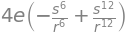

In [4]:
V12 = 4*e*(  (s/r)**12 - (s/r)**6 )
V12

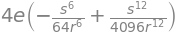

In [5]:
V13 = 4*e*(  (s/(2*r))**12 - (s/(2*r))**6 )
V13

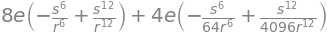

In [6]:
Vt = 2*V12 + V13
Vt

## Find the derivative $dV/dr$

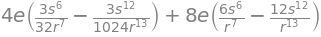

In [12]:
dVt=diff(Vt, r)
dVt

## Solve $dV/dr = 0$

To find the position where the derivative is equal to zero, we use the `sympy` function `solveset`, which solves equations algebraically. It takes at least two arguments: 

* The equation to be solved in the implicit form $f(x)$, where the equation actually solved is $f(x)=0$. If you want to solve $A(x)=B(x)$, `solveset` takes $A-B$.
* The variable we want to solve for. Here the minimal energy bond distance $r$.
* As optional aguments in the form `domain=...` the domain where to search for solutions. The default are the complex numbers.

In the example below, `solveset` finds the correct positive solution, but it also returns the negative solution as well as plenty of complex solutions. Its a math engine, it will be thorough and does not know what you are interested in. 

In [16]:
solveset(dVt, r)

In [13]:
# This is much better
solveset(dVt, r, domain=S.Reals)

In [18]:
# Best: only the positive solution.
solveset(dVt, r, domain=Interval.open(0, oo))

## Substitute the optimal $r$ into $V(r)$

This is the minimal energy at the optimal bond length.

In [26]:
r_opt = (802960115666)**(1/6)*s/86
Vt.subs(r, r_opt)